In [1]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

2023-05-07 16:28:50.666758: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
data_dir = 'dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

In [3]:
diseases = os.listdir(train_dir)
diseases

['Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___T

In [4]:
print("Number of classes : " ,len(diseases))

Number of classes :  38


In [5]:
# Number of images for each disease
nums_train = {}
nums_val = {}
for disease in diseases:
    nums_train[disease] = len(os.listdir(train_dir + '/' + disease))
    nums_val[disease] = len(os.listdir(valid_dir + '/' + disease))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


no. of images
Blueberry___healthy                                          1816
Cherry_(including_sour)___Powdery_mildew                     1683
Cherry_(including_sour)___healthy                            1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Corn_(maize)___Common_rust_                                  1907
Corn_(maize)___Northern_Leaf_Blight                          1908
Corn_(maize)___healthy                                       1859
Grape___Black_rot                                            1888
Grape___Esca_(Black_Measles)                                 1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Grape___healthy                                              1692
Orange___Haunglongbing_(Citrus_greening)                     2010
Peach___Bacterial_spot                                       1838
Peach___healthy                                              1728
Pepper,_bell___Bacterial_spot                                1913
Pepper,_bell___healthy                                       1988
Potato___Early_blight                                        1939
Potato___Late_blight                                         1939
Potato___healthy                                             1824
Raspberry___healthy                                          1781
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Strawberry___Leaf_scorch                                     1774
Strawberry___healthy                                         1824
Tomato___Bacterial_spot                                      1702
Tomato___Early_blight                                        1920
Tomato___Late_blight                                         1851
Tomato___Leaf_Mold                                           1882
Tomato___Septoria_leaf_spot                                  1745
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___Target_Spot                                         1827
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Tomato___Tomato_mosaic_virus                                 1790
Tomato___healthy                                             1926
Apple___Apple_scab                                           2016
Apple___Black_rot                                            1987
Apple___Cedar_apple_rust                                     1760
Apple___healthy                                              2008

<Axes: title={'center': 'Train data distribution '}, xlabel='Number of image', ylabel='Planet'>

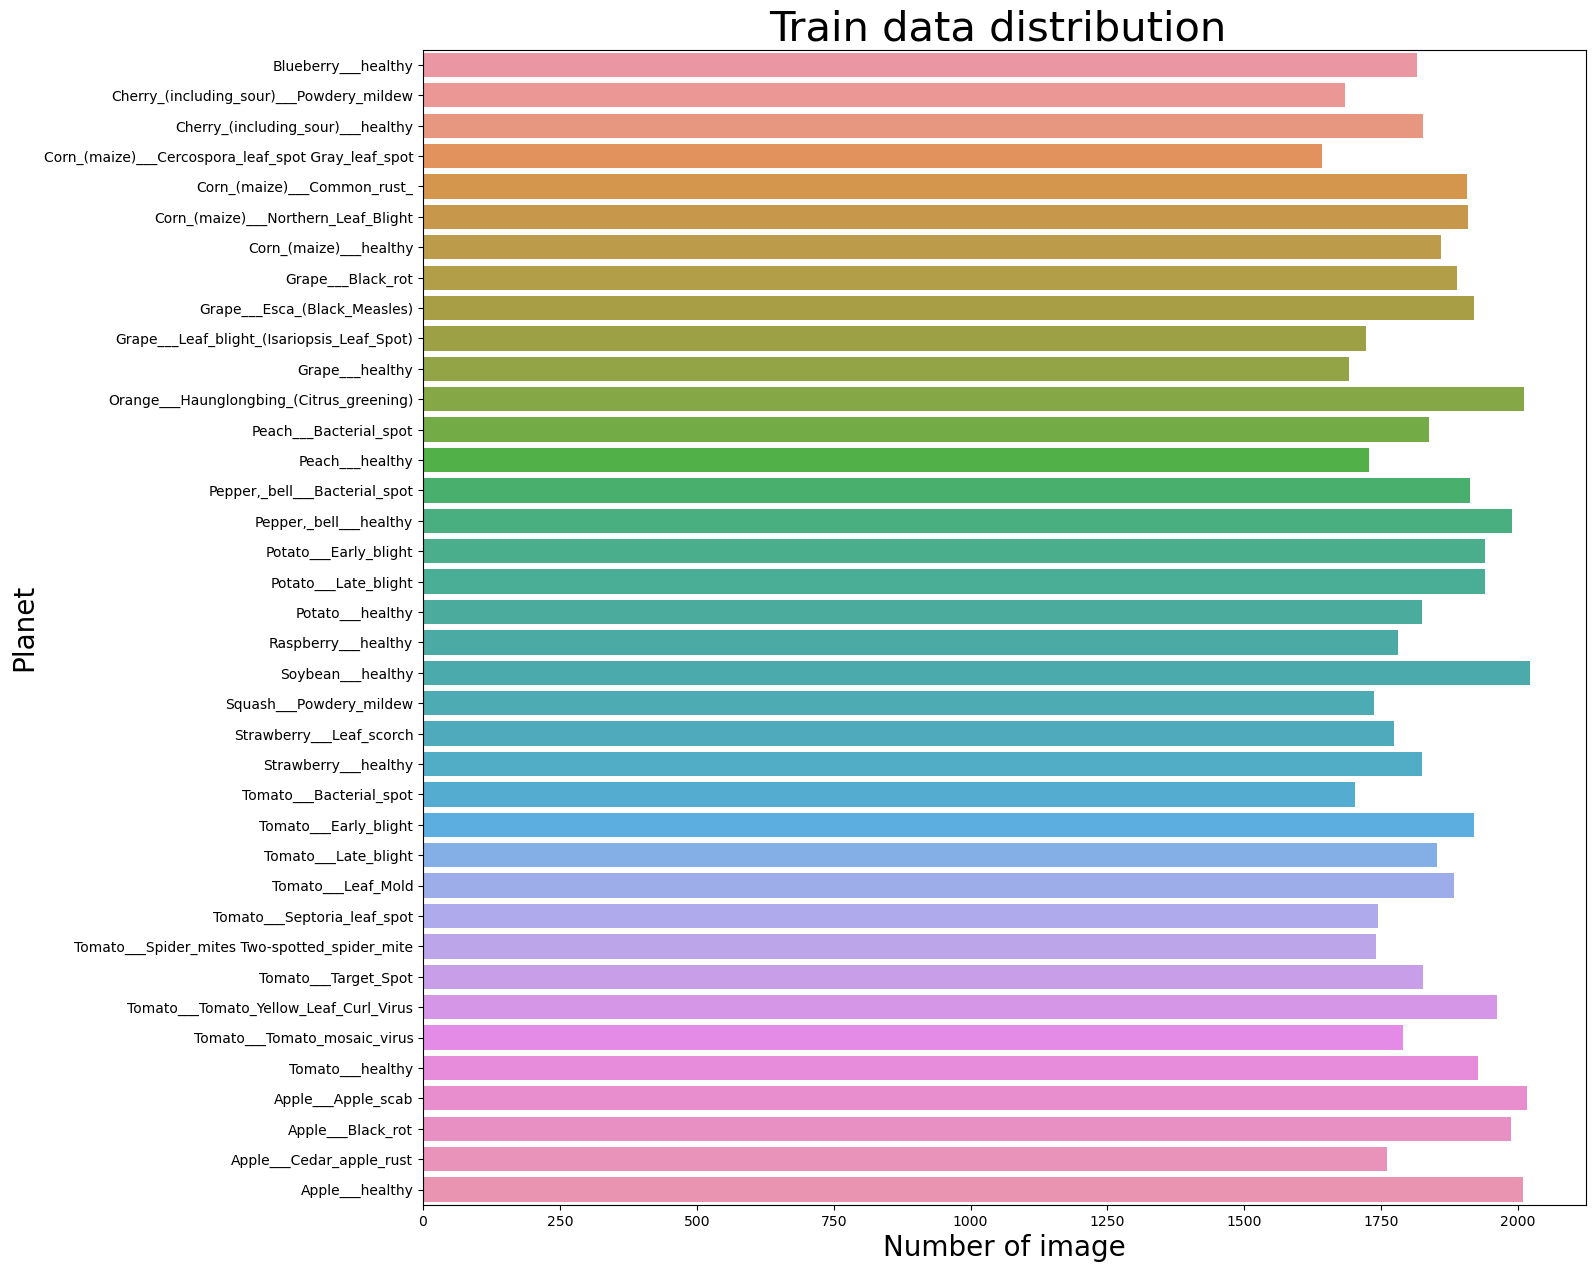

In [6]:
plt.figure(figsize=(15,15))
plt.title('Train data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Planet',fontsize=20)

keys = list(nums_train.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_train.values())
sns.barplot(y=keys, x=vals)

In [7]:
# show number of images in train data
number_train = 0
for value in nums_train.values():
    number_train += value
print("The number of images for training : ",number_train)

The number of images for training :  70295


In [8]:
healthy_plants=[]
diseases_unique=[]
for i in diseases:
  if(i.split('__'))[0] not in healthy_plants:
    healthy_plants.append(i.split('__')[0])
  if(i.split('___'))[1] != 'healthy':
    diseases_unique.append(i.split('___')[1])

In [9]:
print(f'Total no of diseased plants {len(diseases_unique)} and Totanl no of healthy plants {len(healthy_plants)}')

Total no of diseased plants 26 and Totanl no of healthy plants 14


In [10]:
img_per_class_val = pd.DataFrame(nums_val.values(), index=nums_val.keys(), columns=["no. of images"])
print('Validation data distribution :')
img_per_class_val

Validation data distribution :


no. of images
Blueberry___healthy                                           454
Cherry_(including_sour)___Powdery_mildew                      421
Cherry_(including_sour)___healthy                             456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            410
Corn_(maize)___Common_rust_                                   477
Corn_(maize)___Northern_Leaf_Blight                           477
Corn_(maize)___healthy                                        465
Grape___Black_rot                                             472
Grape___Esca_(Black_Measles)                                  480
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                    430
Grape___healthy                                               423
Orange___Haunglongbing_(Citrus_greening)                      503
Peach___Bacterial_spot                                        459
Peach___healthy                                               432
Pepper,_bell___Bacterial_spot                                 478
Pepper,_bell___healthy                                        497
Potato___Early_blight                                         485
Potato___Late_blight                                          485
Potato___healthy                                              456
Raspberry___healthy                                           445
Soybean___healthy                                             505
Squash___Powdery_mildew                                       434
Strawberry___Leaf_scorch                                      444
Strawberry___healthy                                          456
Tomato___Bacterial_spot                                       425
Tomato___Early_blight                                         480
Tomato___Late_blight                                          463
Tomato___Leaf_Mold                                            470
Tomato___Septoria_leaf_spot                                   436
Tomato___Spider_mites Two-spotted_spider_mite                 435
Tomato___Target_Spot                                          457
Tomato___Tomato_Yellow_Leaf_Curl_Virus                        490
Tomato___Tomato_mosaic_virus                                  448
Tomato___healthy                                              481
Apple___Apple_scab                                            504
Apple___Black_rot                                             497
Apple___Cedar_apple_rust                                      440
Apple___healthy                                               502

<Axes: title={'center': 'Validation data distribution '}, xlabel='Number of image', ylabel='Planet'>

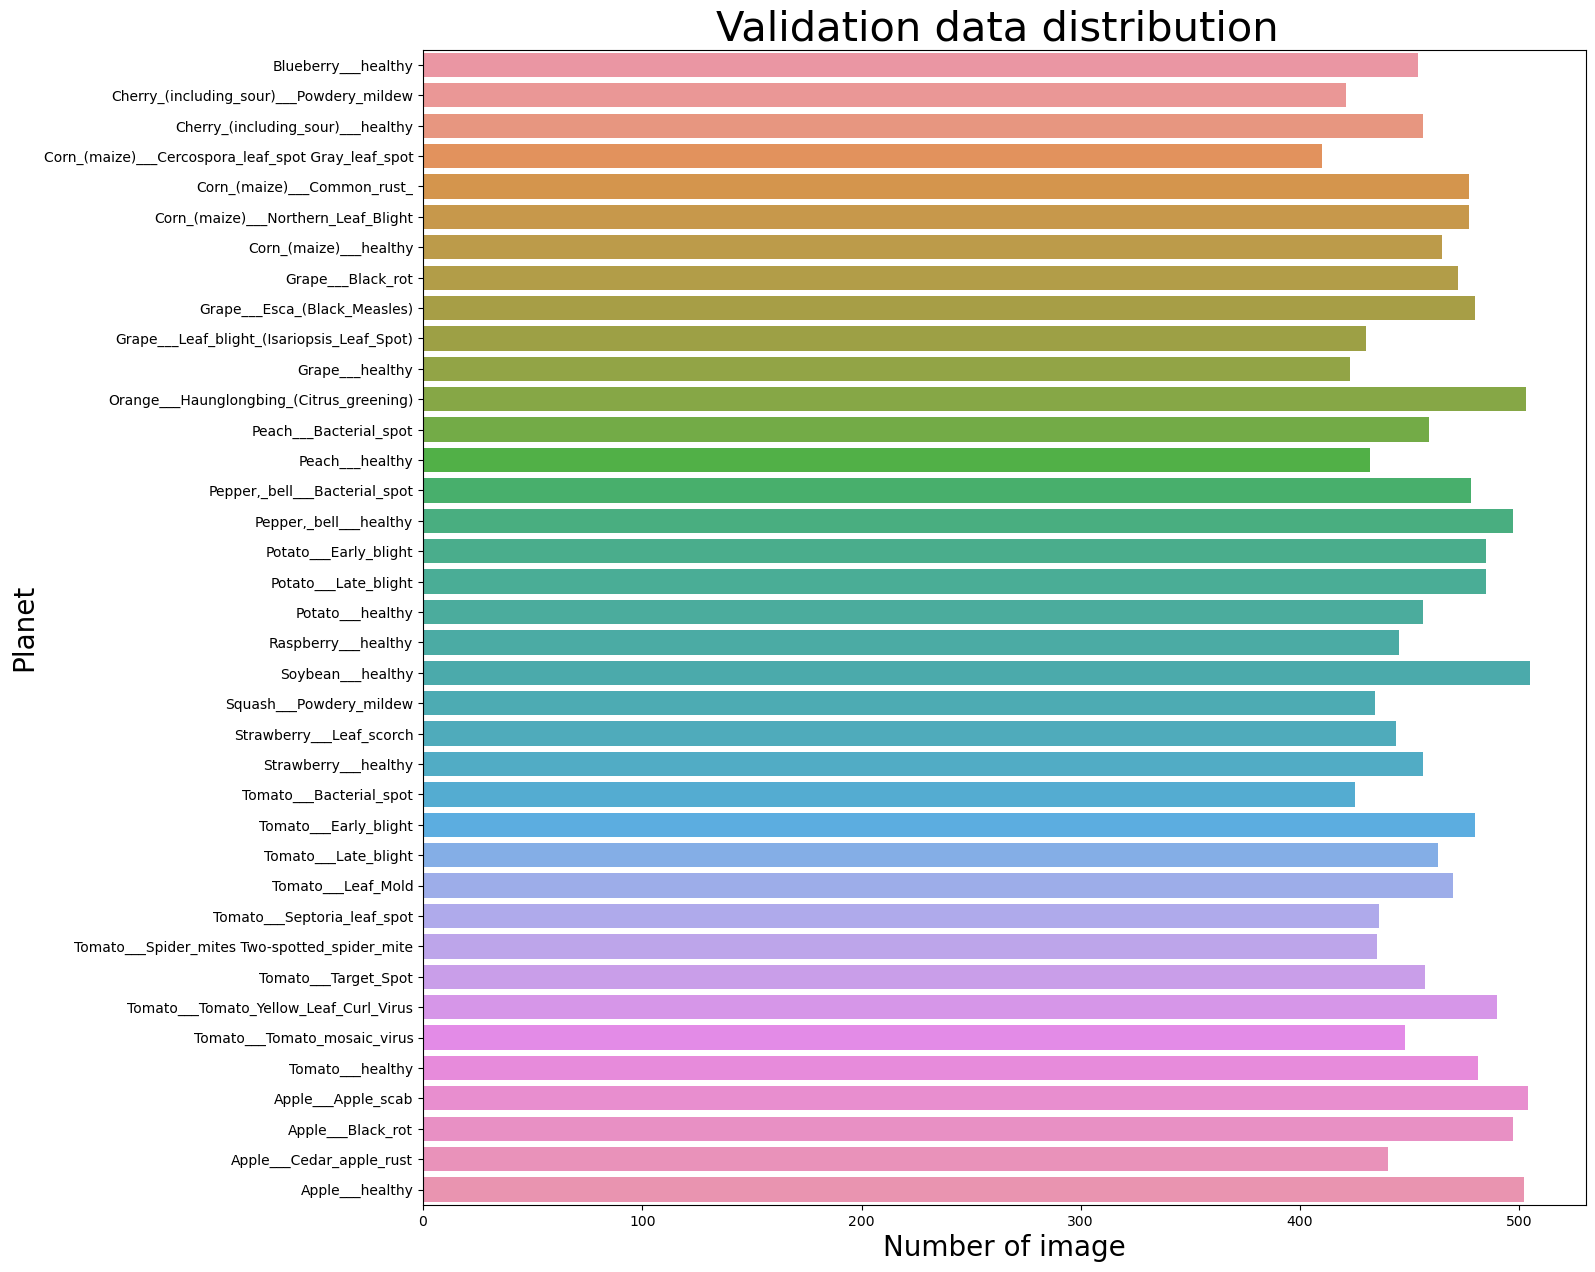

In [11]:
plt.figure(figsize=(15,15))
plt.title('Validation data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Planet',fontsize=20)

keys = list(nums_val.keys())
# get values in the same order as keys, and parse percentage values
vals = list(nums_val.values())
sns.barplot(y=keys, x=vals)

In [12]:
# show number of images in validation data
number_val = 0
for value in nums_val.values():
    number_val += value
print("The number of images for validation : ",number_val)

The number of images for validation :  17572


In [14]:
dir(tf.keras.utils)

['CustomObjectScope',
 'GeneratorEnqueuer',
 'OrderedEnqueuer',
 'Progbar',
 'Sequence',
 'SequenceEnqueuer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'custom_object_scope',
 'deserialize_keras_object',
 'get_custom_objects',
 'get_file',
 'get_registered_name',
 'get_registered_object',
 'get_source_inputs',
 'model_to_dot',
 'normalize',
 'pack_x_y_sample_weight',
 'plot_model',
 'register_keras_serializable',
 'serialize_keras_object',
 'to_categorical',
 'unpack_x_y_sample_weight']

In [3]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(256, 256))
valid_data = tf.keras.preprocessing.image_dataset_from_directory(valid_dir,image_size=(256, 256))

Found 70295 files belonging to 38 classes.


2023-05-07 16:29:33.412102: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-07 16:29:33.413176: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-05-07 16:29:33.427988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-07 16:29:33.428211: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2023-05-07 16:29:33.428258: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-05-07 16:29:33.429786: I tensorflow/stream_executor/platform/def

Found 17572 files belonging to 38 classes.


In [4]:
class_names = train_data.class_names

In [7]:
class_indies = {}
for i,label in enumerate(class_names):
    class_indies[label] = i

In [8]:
class_indies

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [9]:
import json
with open('label.json','w') as f:
    json.dump(class_indies,f)

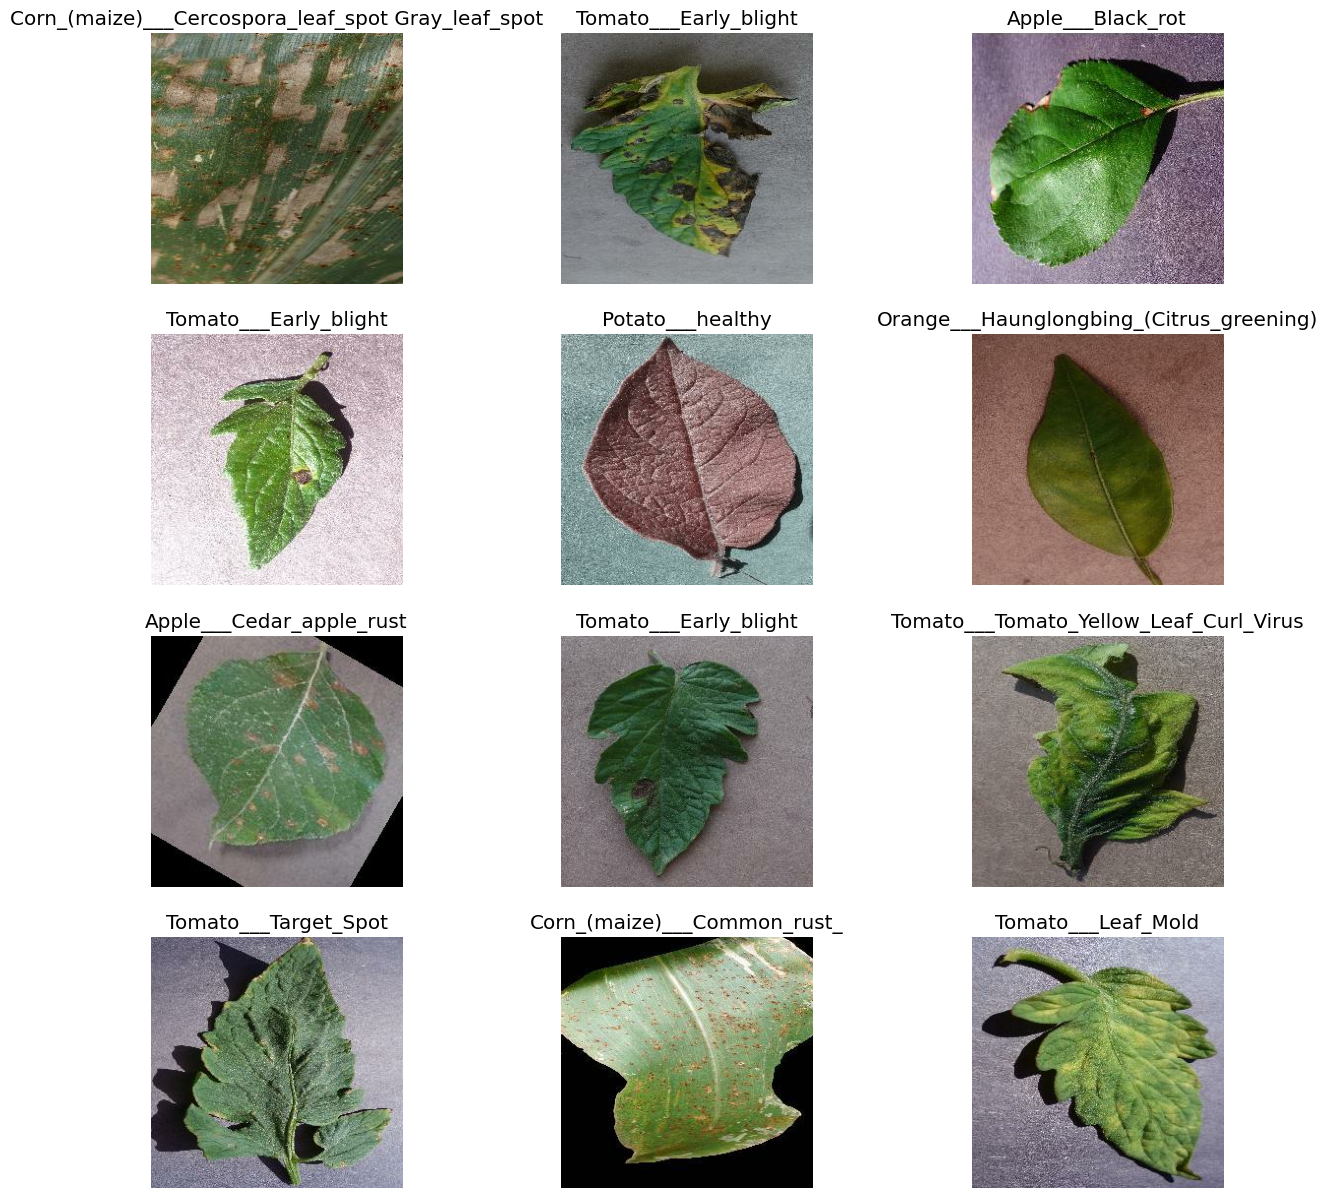

In [64]:
plt.figure(figsize=(15,15))
for img_batch,label_batch in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(4,3,i+1)
        plt.rcParams.update({'font.size': 12})
        plt.imshow(img_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [5]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1.0/255)

In [6]:
train_gen = train_data.map(lambda image,label:(rescale(image),label))
valid_gen  = valid_data.map(lambda image,label:(rescale(image),label))

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy',min_delta=.01,patience=3,verbose=1)

mc = ModelCheckpoint(filepath='best_model.h5',monitor='val_accuracy',min_delta=.01,patience=3,verbose=1,save_best_only=True)

cb = [es,mc]

In [27]:
model_3 = keras.Sequential()

model_3.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model_3.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.MaxPooling2D(3,3))

model_3.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.MaxPooling2D(3,3))

model_3.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.MaxPooling2D(3,3))

model_3.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model_3.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model_3.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model_3.add(keras.layers.Flatten())

model_3.add(keras.layers.Dense(1568,activation="relu"))
model_3.add(keras.layers.Dropout(0.5))

model_3.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model_3.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 85, 85, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)      

In [29]:
history = model_3.fit_generator(train_gen,
          validation_data=valid_gen,
          epochs = 10,callbacks=cb)

Epoch 1/10


2023-05-06 16:27:37.044573: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-05-06 16:28:02.147175: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-05-06 16:28:02.689729: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


2196/2197 [============================>.] - ETA: 1s - loss: 2.8926 - accuracy: 0.1938

2023-05-06 17:11:36.037021: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.63GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-05-06 17:12:04.413919: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


2197/2197 [==============================] - 3106s 1s/step - loss: 2.8918 - accuracy: 0.1940 - val_loss: 0.6941 - val_accuracy: 0.7794

Epoch 00001: val_accuracy improved from -inf to 0.77936, saving model to best_model.h5


2023-05-06 17:19:24.343284: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 260112384 exceeds 10% of free system memory.
2023-05-06 17:19:32.063053: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 260112384 exceeds 10% of free system memory.
2023-05-06 17:19:39.042277: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 260112384 exceeds 10% of free system memory.


Epoch 2/10


2023-05-06 17:20:11.392951: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 98 of 256
2023-05-06 17:20:21.403732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 152 of 256
2023-05-06 17:20:27.855200: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


2197/2197 [==============================] - 3242s 1s/step - loss: 0.6029 - accuracy: 0.8096 - val_loss: 0.2886 - val_accuracy: 0.9055

Epoch 00002: val_accuracy improved from 0.77936 to 0.90553, saving model to best_model.h5


2023-05-06 18:14:04.923269: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 260112384 exceeds 10% of free system memory.
2023-05-06 18:14:11.698212: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 260112384 exceeds 10% of free system memory.


Epoch 3/10
2197/2197 [==============================] - 2788s 1s/step - loss: 0.3011 - accuracy: 0.9043 - val_loss: 0.1758 - val_accuracy: 0.9424

Epoch 00003: val_accuracy improved from 0.90553 to 0.94235, saving model to best_model.h5
Epoch 4/10


2023-05-06 19:01:51.947702: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 99 of 256
2023-05-06 19:02:01.197291: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 164 of 256
2023-05-06 19:02:04.782500: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


2197/2197 [==============================] - 2597s 1s/step - loss: 0.2052 - accuracy: 0.9312 - val_loss: 0.1300 - val_accuracy: 0.9569

Epoch 00004: val_accuracy improved from 0.94235 to 0.95686, saving model to best_model.h5
Epoch 5/10


2023-05-06 19:45:23.705571: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 76 of 256
2023-05-06 19:45:33.142867: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 124 of 256
2023-05-06 19:45:38.924425: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


2197/2197 [==============================] - 2803s 1s/step - loss: 0.1497 - accuracy: 0.9493 - val_loss: 0.1649 - val_accuracy: 0.9492

Epoch 00005: val_accuracy did not improve from 0.95686
Epoch 6/10
2197/2197 [==============================] - 2783s 1s/step - loss: 0.1178 - accuracy: 0.9601 - val_loss: 0.1771 - val_accuracy: 0.9462

Epoch 00006: val_accuracy did not improve from 0.95686
Epoch 7/10
2197/2197 [==============================] - 2613s 1s/step - loss: 0.0964 - accuracy: 0.9679 - val_loss: 0.1000 - val_accuracy: 0.9686

Epoch 00007: val_accuracy improved from 0.95686 to 0.96864, saving model to best_model.h5
Epoch 8/10


2023-05-06 22:02:26.282756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 96 of 256
2023-05-06 22:02:32.246895: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


2197/2197 [==============================] - 2600s 1s/step - loss: 0.0754 - accuracy: 0.9754 - val_loss: 0.1306 - val_accuracy: 0.9601

Epoch 00008: val_accuracy did not improve from 0.96864
Epoch 9/10


2023-05-06 22:45:44.080626: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 244 of 256
2023-05-06 22:45:44.528482: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


2197/2197 [==============================] - 2336s 1s/step - loss: 0.0652 - accuracy: 0.9783 - val_loss: 0.1787 - val_accuracy: 0.9512

Epoch 00009: val_accuracy did not improve from 0.96864
Epoch 10/10


2023-05-06 23:24:40.568486: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 234 of 256
2023-05-06 23:24:41.315285: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


2197/2197 [==============================] - 2389s 1s/step - loss: 0.0613 - accuracy: 0.9800 - val_loss: 0.1089 - val_accuracy: 0.9672

Epoch 00010: val_accuracy did not improve from 0.96864
Epoch 00010: early stopping


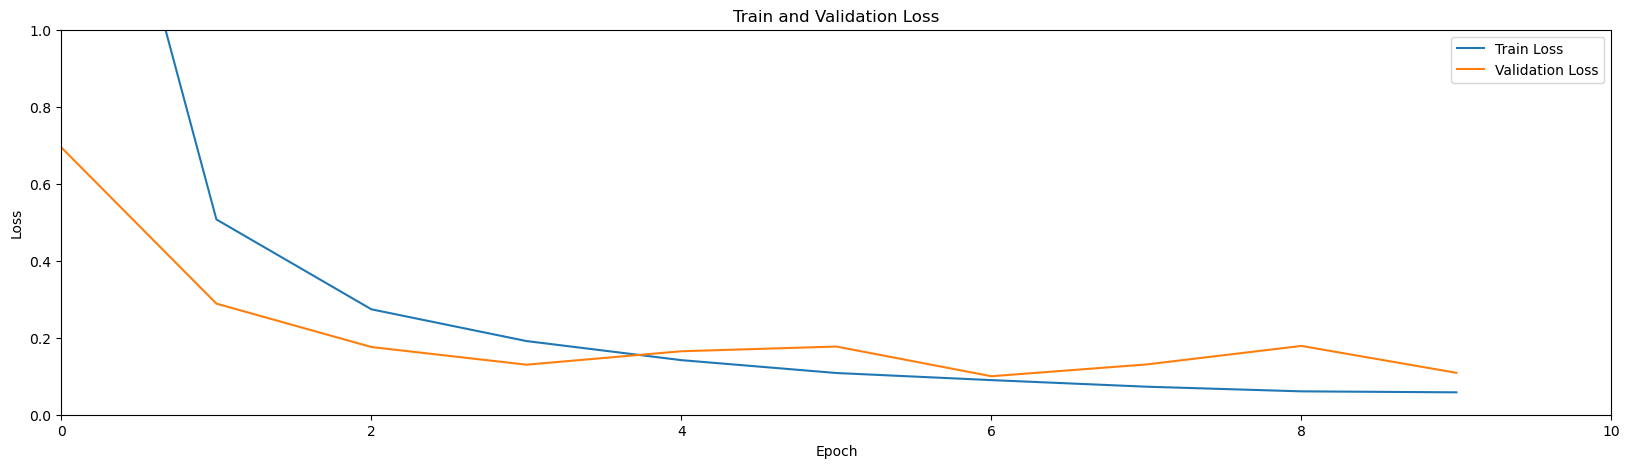

In [31]:
plt.figure(figsize = (20,5))
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

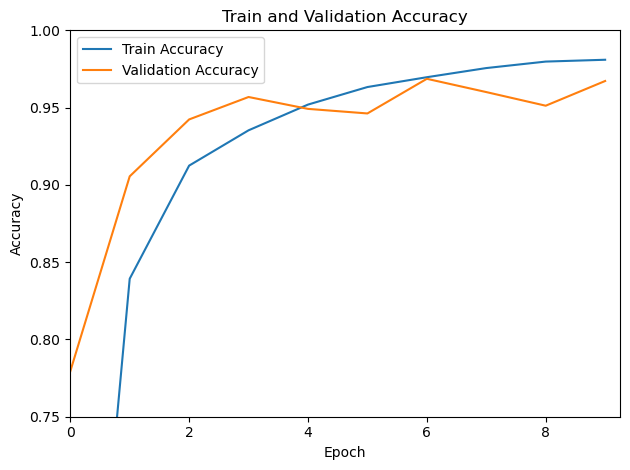

In [32]:
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [7]:
from tensorflow.keras.models import load_model

In [8]:
test_model = load_model('best_model.h5')

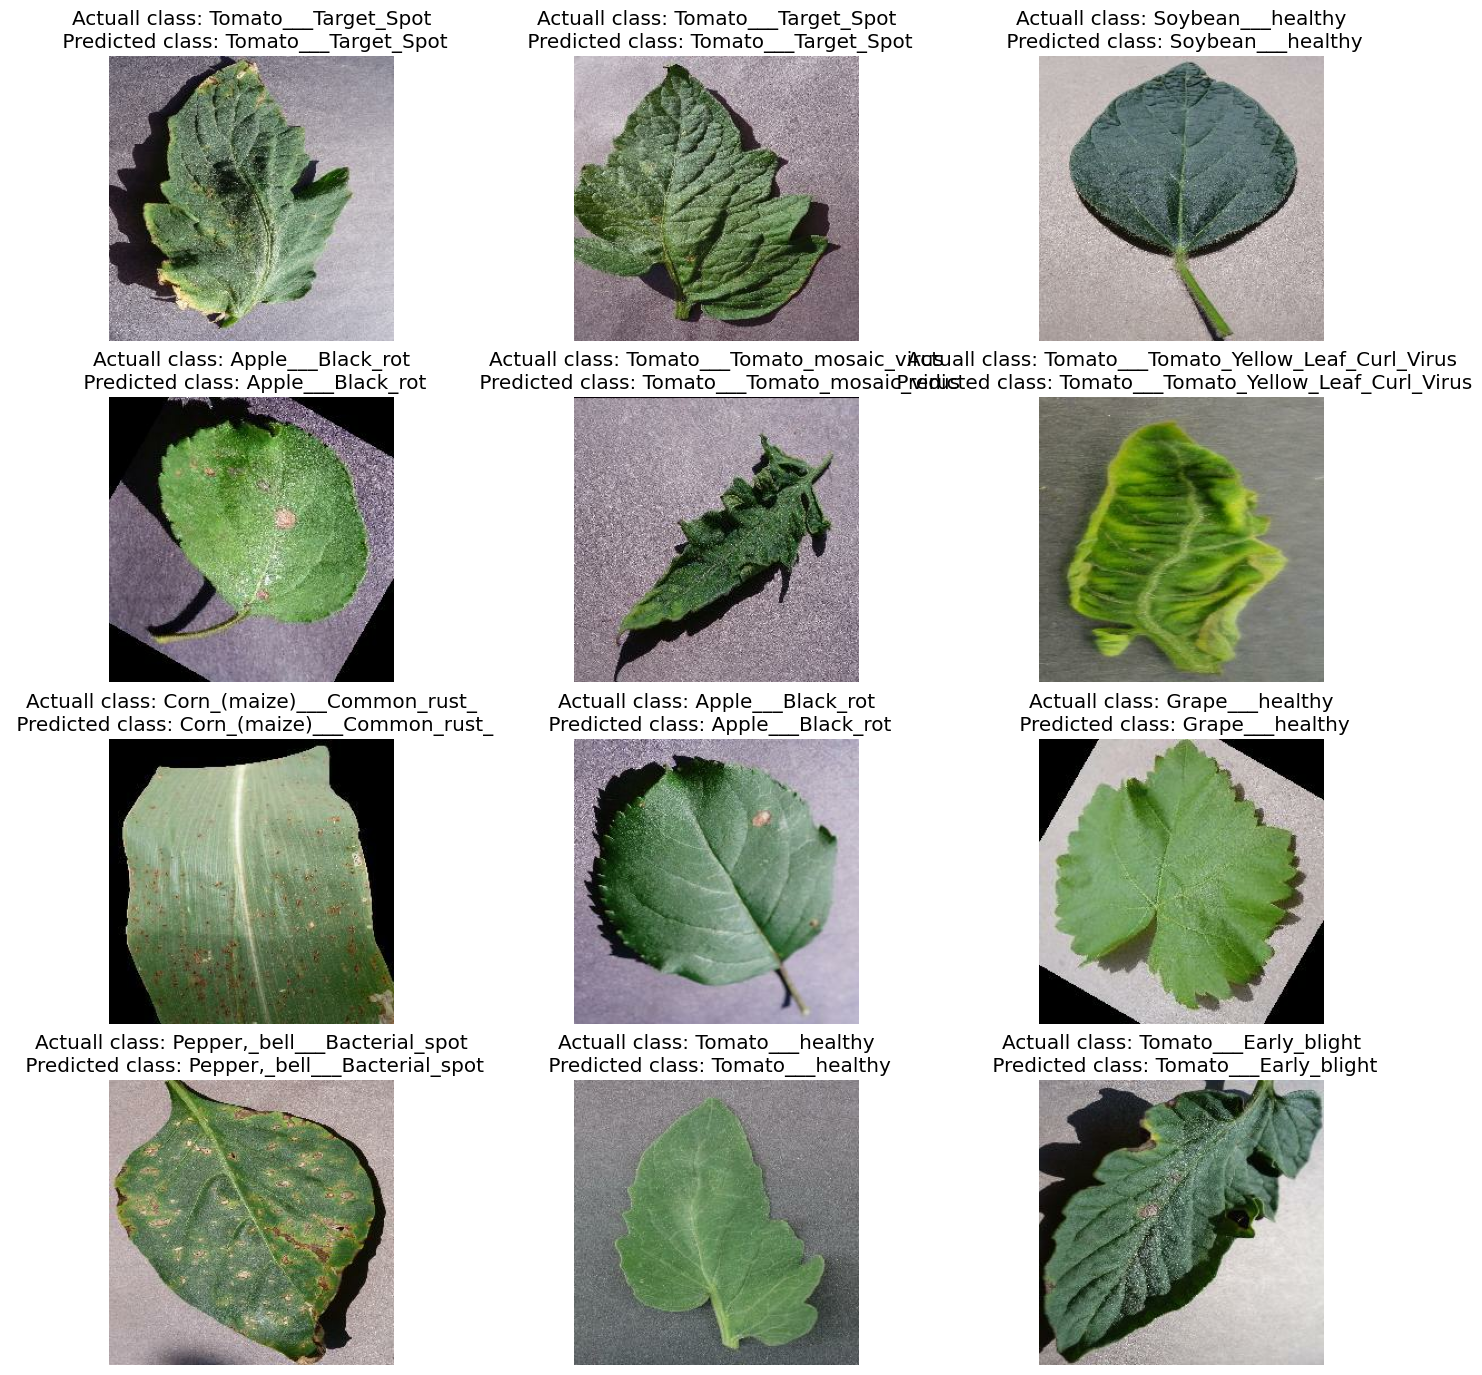

In [107]:
plt.figure(figsize=(17,17))
for img_batch,label_batch in valid_gen.take(1):
    for i in range(12):
        ax = plt.subplot(4,3,i+1)
        plt.rcParams.update({'font.size': 12})
        predicted_class = class_names[np.argmax(test_model(img_batch[i].numpy().reshape(1,256,256,3)))]
        plt.imshow(img_batch[i].numpy())
        plt.title(f'Actuall class: {class_names[label_batch[i]]}\n Predicted class: {class_names[label_batch[i]]}')
        plt.axis('off')

In [120]:
y_pred = []
y_hat = []

for img,lab in valid_gen.take(16):
    for i in range(32):
        y_pred.append(np.argmax(test_model(img[i].numpy().reshape(1,256,256,3))))
        y_hat.append(lab[i].numpy())

In [121]:
#print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(y_hat, y_pred) * 100))
print("Precision Score : {:.2f} %".format(precision_score(y_hat, y_pred, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(y_hat, y_pred, average='micro') * 100))

Test Accuracy   : 97.27 %
Precision Score : 97.27 %
Recall Score    : 97.27 %


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_hat,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       0.93      1.00      0.96        13
           3       0.91      0.91      0.91        11
           4       1.00      0.94      0.97        16
           5       0.94      1.00      0.97        15
           6       1.00      1.00      1.00        19
           7       1.00      0.91      0.95        11
           8       0.92      1.00      0.96        12
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        12
          13       0.89      1.00      0.94         8
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00        14
          16       1.00      1.00      1.00         7
          17       1.00    

<Figure size 2000x500 with 0 Axes>

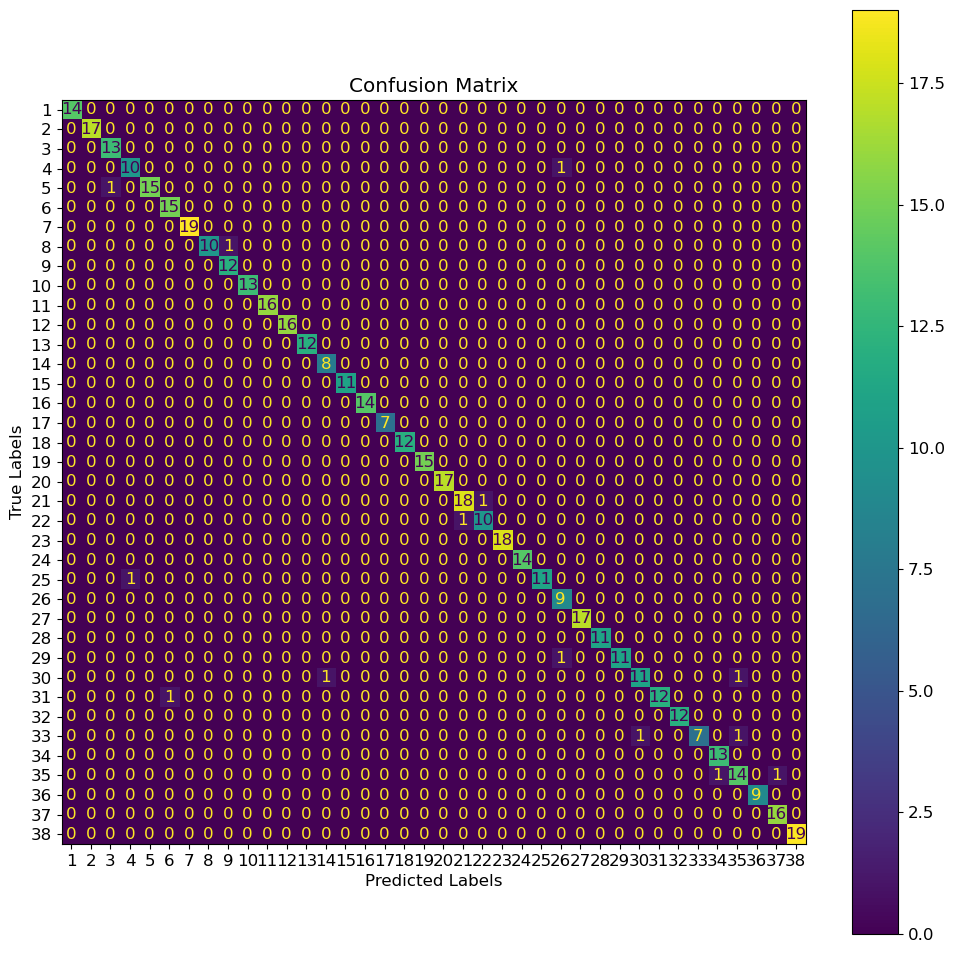

In [122]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(y_hat, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()